<div id="header">
    <p style="color:black; text-align:center; font-weight:bold; font-family:Tahoma, sans-serif; font-size:24px;">
        Feature Scaling - Standardization
    </p>
</div>

<div style="background-color:#bfbfbf; padding:8px; border:2px dotted black; border-radius:8px; font-family:sans-serif; line-height: 1.7em">

**Feature scaling** is a technique used to normalize or standardize the range of independent variables (features) in a dataset.

**Standardization:** Standardization is a specific type of feature scaling that transforms the features so that they have a mean of 0 and a standard deviation of 1. This technique is often used when the features have different units or magnitudes but are normally distributed.

**Formula for standardization:**

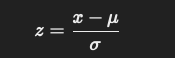

Where:

x is the original value,

μ is the mean of the feature,

σ is the standard deviation of the feature.

After standardization, the feature will have a mean of 0 and a variance of 1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('car_data_prediction.csv')

In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.head(10)

,User ID,Age,AnnualSalary,Purchased
0,385,35,20000,0
1,681,40,43500,0
2,353,49,74000,0
3,895,40,107500,1
4,661,25,79000,0
5,846,47,33500,1
6,219,46,132500,1
7,588,42,64000,0
8,85,30,84500,0
9,465,41,52000,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Age', 'AnnualSalary']]
y = df['Purchased']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Shapes of the splits
print(X_train.shape, X_test.shape)

(700, 2) (300, 2)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)     #fit is calculating mean and standard deviation

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([4.04671429e+01, 7.27292857e+04])

In [ ]:
X_train

,Age,AnnualSalary
105,51,21500
68,41,45000
479,34,114500
399,45,151500
434,41,66500
...,...,...
835,42,53500
192,26,118000
629,61,84500
559,30,62000


In [ ]:
#Converted into dataframe otherwise it will result in numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled

,Age,AnnualSalary
0,0.991423,-1.474322
1,0.050156,-0.798018
2,-0.608731,1.202115
3,0.426663,2.266934
4,0.050156,-0.179272
...,...,...
695,0.144283,-0.553398
696,-1.361744,1.302841
697,1.932690,0.338748
698,-0.985238,-0.308777


In [ ]:
np.round(X_train.describe(), 1)

,Age,AnnualSalary
count,700.0,700.0
mean,40.5,72729.3
std,10.6,34772.5
min,18.0,15000.0
25%,33.0,46875.0
50%,40.0,71000.0
75%,48.0,90500.0
max,63.0,152500.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,AnnualSalary
count,700.0,700.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.1,-1.7
25%,-0.7,-0.7
50%,-0.0,-0.0
75%,0.7,0.5
max,2.1,2.3


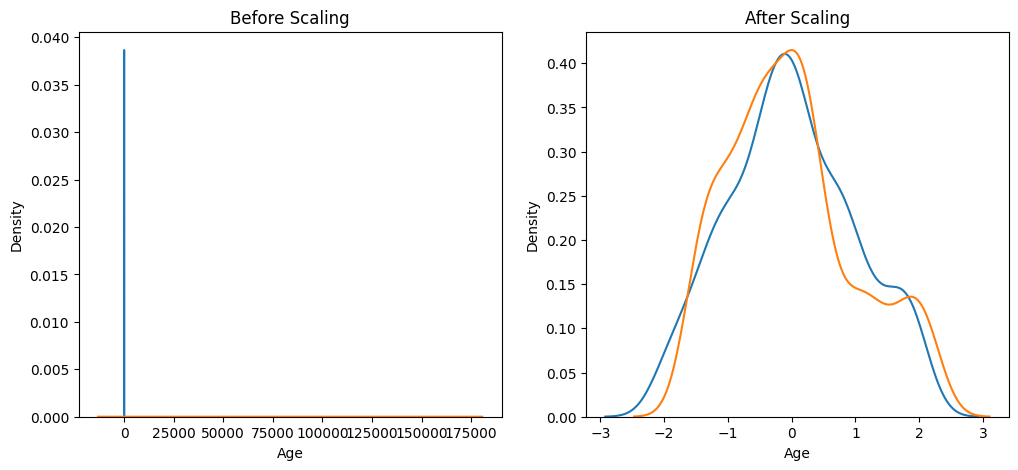

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['AnnualSalary'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['AnnualSalary'], ax=ax2)
plt.show()

**NOTE:**

(i) Before scaling, the features Age and AnnualSalary had significantly different ranges, with AnnualSalary spanning much larger values.

(ii) After scaling, both features are rescaled to a comparable range (centered around 0 with a unit standard deviation).